## Setup
* Identify the version of python and sklearn. This project need python version is 3.7 or above, Scikit-Learn ≥ 1.0.1:
* Set the matplot.pyplot basic font size
* save plot function


In [6]:
import sys
import sklearn
from packaging import version
import matplotlib.pyplot as plt

In [7]:
assert sys.version_info >= (3,7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [8]:
plt.rc('font', size =14)
plt.rc('legend', fontsize=14,)
plt.rc('axes',labelsize=14, titlesize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [66]:
from pathlib import Path
fig_path= Path()/'images'/'decision_tree'
fig_path.mkdir(parents=True, exist_ok=True)
def save_fig(fig_id, tight_layout= True,resolution=300,file_extension='png'):
    fig_file_detail = fig_path/f'{fig_id}.{file_extension}'
    if tight_layout:
        plt.tight_layout()
    plt.savefig(fig_file_detail,dpi= resolution,format=file_extension)

## Training an visualizing a Decision tree

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [36]:
iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target

In [37]:
tree_clf= DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [38]:
export_graphviz(
tree_clf,
    out_file= str(fig_path/'iris_tree.dot'),
    feature_names=['petal length (cm)', 'petal width (cm)'],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [39]:
from graphviz import Source

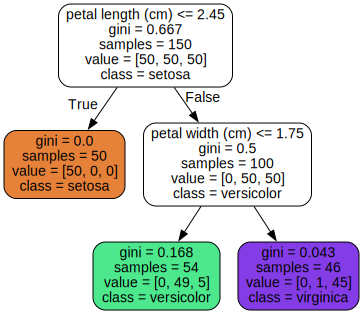

In [40]:
Source.from_file(fig_path /'iris_tree.dot')

Graphviz also provides the dot command line tool to convert .dot files to a variety of formats. The following command converts the dot file to a png image:

## Making Prediction

In [71]:
# plot decsion tree decision boundaries
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree

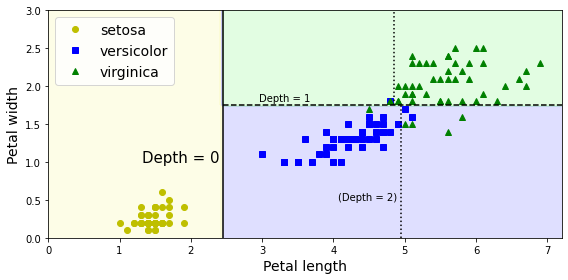

In [68]:
customer_map= ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8,4))

width = np.linspace(0,3,100)
length = np.linspace(0,7.2,100)
xv, yv = np.meshgrid(length, width)
X_new = np.c_[xv.ravel(), yv.ravel()]
y_pred = tree_clf.predict(X_new).reshape(xv.shape)
plt.contourf(xv,yv, y_pred,alpha=0.3, cmap= customer_map)

for idx, (name,style) in enumerate(zip(iris.target_names,('yo','bs','g^'))):
    plt.plot(X[:,0][y==idx],X[:,1][y==idx], style,label= f'{name}')
    
    
plt.xlabel('Petal length')
plt.ylabel('Petal width')

tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X,y)
th0, th1, th2a, th2b= tree_clf_deeper.tree_.threshold[[0,2,3,6]] #split node
plt.plot([th0,th0],[0,3],'k-')
plt.plot([th0,7.2],[th1,th1],'k--')
plt.plot([th2a,th2a],[0,th1],'k:')
plt.plot([th2b,th2b],[th1,3],'k:')
plt.text(th0-0.05,1, "Depth = 0", horizontalalignment='right',fontsize=15)
plt.text(th0+0.5,th1+0.05, "Depth = 1", horizontalalignment='left',fontsize=10)
plt.text(th2a-0.05,0.5, "(Depth = 2)", horizontalalignment='right',fontsize=10)

plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_decision_boundaries_plot")

plt.show()

In [48]:
tree_clf_deeper.tree_.threshold


array([ 2.44999999, -2.        ,  1.75      ,  4.95000005, -2.        ,
       -2.        ,  4.85000014, -2.        , -2.        ])

In [69]:
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

In [70]:
tree_clf_deeper.tree_.node_count

9

[Text(0.375, 0.875, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'X[0] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'X[0] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

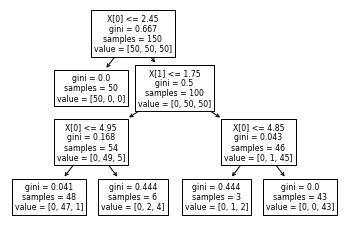

In [72]:
tree.plot_tree(tree_clf_deeper)

In [79]:
tree_clf_deeper.tree_.impurity #gini value

array([0.66666667, 0.        , 0.5       , 0.16803841, 0.04079861,
       0.44444444, 0.04253308, 0.44444444, 0.        ])

In [74]:
tree_clf_deeper.tree_.max_depth #The depth of tree,i.e. the maximum depth of its leaves and the root node is depth 0)

3

the root node is depth 0, the left and right children nodes of node _i_ are `children_left[i]` and `children_right[i]`  

In [83]:
tree_clf_deeper.tree_.children_left[0],tree_clf_deeper.tree_.children_right[0]

(1, 2)

In [82]:
tree_clf_deeper.tree_.children_left

array([ 1, -1,  3,  4, -1, -1,  7, -1, -1], dtype=int64)

In [87]:
# When the left and right nodes are equal, it means this is a leaf node (and the children node ids are arbitrary):
tree_clf_deeper.tree_.children_left[4],tree_clf_deeper.tree_.children_right[4]

(-1, -1)

In [93]:
is_leaf= (tree_clf_deeper.tree_.children_left ==tree_clf_deeper.tree_.children_right)
np.arange(tree_clf_deeper.tree_.node_count)[is_leaf]

array([1, 4, 5, 7, 8])

In [96]:
# non-leaf node is called split, and we could find the feature they are using to split through tree_.feature.
# the leaf node should be excluded
print(np.arange(tree_clf_deeper.tree_.node_count)[~is_leaf])
tree_clf_deeper.tree_.feature

[0 2 3 6]


array([ 0, -2,  1,  0, -2, -2,  0, -2, -2], dtype=int64)

In [99]:
# the number of instances per class that reached each node is available in value 
tree_clf_deeper.tree_.value #[node_count, n_outputs, max_n_classes]

array([[[50., 50., 50.]],

       [[50.,  0.,  0.]],

       [[ 0., 50., 50.]],

       [[ 0., 49.,  5.]],

       [[ 0., 47.,  1.]],

       [[ 0.,  2.,  4.]],

       [[ 0.,  1., 45.]],

       [[ 0.,  1.,  2.]],

       [[ 0.,  0., 43.]]])

In [76]:
tree_clf_deeper.tree_.max_n_classes

3

In [77]:
tree_clf_deeper.tree_.n_features

2

In [78]:
tree_clf_deeper.tree_.n_outputs

1

In [106]:
tree_clf_deeper.tree_.n_node_samples

array([150,  50, 100,  54,  48,   6,  46,   3,  43], dtype=int64)

In [108]:
np.all(tree_clf_deeper.tree_.value.sum(axis=(1,2))==tree_clf_deeper.tree_.n_node_samples)

True

## Estimating Class Probabilities

In [113]:
tree_clf.predict_proba([[5,1.5]]), tree_clf.predict_proba([[6,1.5]]) # 0/54, 49/54, 5/54

(array([[0.        , 0.90740741, 0.09259259]]),
 array([[0.        , 0.90740741, 0.09259259]]))

In [111]:
tree_clf.predict([[5,1.5]])

array([1])

[Text(0.4, 0.8333333333333334, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

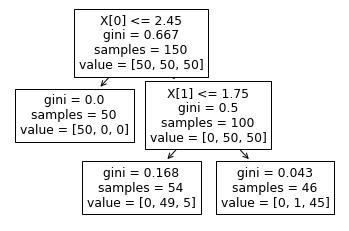

In [112]:
tree.plot_tree(tree_clf)

## Regularization Hyperparameters

In [116]:
from sklearn.datasets import make_moons


In [117]:
X_moons, y_moons  = make_moons(n_samples=150, noise=0.2, random_state=42)
#non restriction 
tree_clf_moon1= DecisionTreeClassifier(random_state=42)
tree_clf_moon2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree_clf_moon1.fit(X_moons, y_moons)
tree_clf_moon2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

In [137]:
def plot_decision_boundary(tree_model, X, y, axes, cmap):
    X_new, = np.meshgrid(np.linspace(axes[0],aexs[1],100), np.linspace(axes,100))
    
    markers = ("o", "^")
    colors = {'Wistia':["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    for idx in [0,1]:
        plt.plot(X[:,0][y_moons==idx],X[:,1][y==idx],
                 color=colors[cmap][idx],
                 marker=markers[idx], linestyle="None")

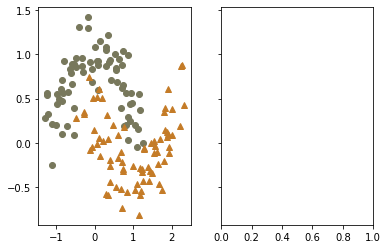

In [138]:
fig, axes = plt.subplots(1,2, sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_moon1,X_moons, y_moons,
                       axes=[-1.5], cmap='Wistia')


In [139]:
np.max(X_moons[:,0])

2.309053937669191

## Decision tree for moons dataset
### Basic Decision tree for moons dataset

In [21]:
from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

In [7]:
para={"max_leaf_nodes": list(range(2,100)),
      "max_depth":list(range(3,10)),
      "min_samples_leaf":list(range(5,10))
    
}
gcv = GridSearchCV(DecisionTreeClassifier(random_state=42),
             para,
             cv=3)

gcv.fit(X_train, y_train)
gcv.best_params_

{'max_depth': 9, 'max_leaf_nodes': 37, 'min_samples_leaf': 9}

In [36]:
y_pred=gcv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8635

### Grow a forest from basic decision tree

In [12]:
# Generate 1,000 subsets of the training set, each contains 100 instances selectd randomly
from sklearn.model_selection import ShuffleSplit

In [14]:
n_subsets =1000
n_instances =100
mini_set =[]
ss = ShuffleSplit(n_splits=n_subsets, test_size=len(X_train)-n_instances, random_state=42)
for mini_train_idx, mini_test_idx in ss.split(X_train):
    X_mini_train = X_train[mini_train_idx]
    y_mini_train = y_train[mini_train_idx]
    mini_set.append((X_mini_train, y_mini_train))

In [18]:
#Train one Decision tree on each subset, using the best hyperparmameter values found in previous excercise
from sklearn.base import clone
trees = [clone(gcv.best_estimator_) for _ in range(n_subsets)]

In [24]:

accuracy_scores=[]
for tree, (X_mini_train, y_mini_train) in zip(trees,mini_set):
    tree.fit(X_mini_train, y_mini_train)
    y_pred_mini = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_mini))
    
np.mean(accuracy_scores).round(3)

0.8

In [28]:
# For each test set instances, generate the predictions of the 1,000 Decision Trees 
# and keep only the most frequent preidictions
from scipy.stats import mode 

y_pred_test=[]
for tree in trees:    
    y_pred_test.append(tree.predict(X_test)) 
    
y_pred_majority_votes, n_votes = mode(y_pred_test,axis=0, keepdims=True)

In [29]:
y_pred_majority_votes, n_votes

(array([[1, 1, 0, ..., 0, 0, 0]], dtype=int64),
 array([[ 980,  954,  902, ...,  976, 1000,  748]]))

In [35]:
accuracy_score(y_test, y_pred_majority_votes.reshape(-1))

0.843

In [33]:
y_pred_majority_votes.shape

(1, 2000)